In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [2]:
# Loading data

file_path = Path("./crypto_data.csv")
df_crypto = pd.read_csv(file_path, index_col=0)
df_crypto

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df_crypto["IsTrading"]

42       True
365      True
404      True
611      True
808      True
        ...  
XBC      True
DVTC    False
GIOT    False
OPSC    False
PUNK    False
Name: IsTrading, Length: 1252, dtype: bool

In [4]:
df_crypto = df_crypto[df_crypto["IsTrading"]]
df_crypto

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
df_crypto = df_crypto.dropna()
df_crypto

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
df_crypto = df_crypto[df_crypto["TotalCoinsMined"] >0]
df_crypto

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
df_crypto = df_crypto.drop(columns=["CoinName", "IsTrading"])
print(df_crypto.shape)
df_crypto.head(10)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [8]:
df_crypto["Algorithm"].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

In [9]:
len(df_crypto["Algorithm"].unique())

71

In [10]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(df_crypto, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize the data with StandardScaler().
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)


In [12]:
crypto_scaled.shape

(532, 98)

In [13]:
crypto_scaled[0,0]

-0.11710817041617713

In [14]:
crypto_scaled[:,1]

array([-1.52870298e-01, -1.45008997e-01,  4.48942416e+00, -1.52559984e-01,
       -1.52870298e-01, -1.51629040e-01, -1.52545207e-01, -1.52870298e-01,
       -1.49767153e-01, -1.52559984e-01, -9.96650921e-02,  1.57444228e-01,
       -1.52545207e-01, -1.52685587e-01, -1.52559984e-01, -1.47698390e-01,
       -1.52574761e-01, -1.51924578e-01, -1.52622511e-01, -1.52870298e-01,
       -1.23316534e-01,  5.52145247e+00, -1.50361249e-01, -1.49176078e-01,
       -1.51392610e-01, -1.52870298e-01, -1.49220408e-01, -1.51629040e-01,
       -1.52158555e-01, -1.52862910e-01, -1.52559984e-01, -1.52855521e-01,
       -1.52676130e-01, -1.52604314e-01,  4.38204990e-01, -1.52805576e-01,
        9.17609867e-02,  1.57444228e-01,  4.66176116e-02, -1.52559984e-01,
       -1.48440300e-01, -1.52397438e-01, -1.52870298e-01, -1.52870298e-01,
       -1.52704268e-01, -1.47905266e-01, -1.31878117e-01, -1.51835917e-01,
       -1.51802732e-01, -1.51097072e-01, -1.52870298e-01,  1.18591523e+00,
       -1.52545207e-01, -

(array([523.,   5.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.1528703 ,  1.32481792,  2.80250614,  4.28019437,  5.75788259,
         7.23557081,  8.71325903, 10.19094725, 11.66863547, 13.14632369,
        14.62401192]),
 <BarContainer object of 10 artists>)

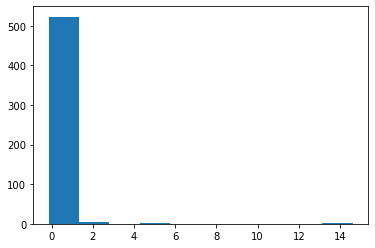

In [15]:
plt.hist(crypto_scaled[:,1])

(array([531.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.0433963 ,  2.26528705,  4.57397041,  6.88265376,  9.19133712,
        11.50002047, 13.80870382, 16.11738718, 18.42607053, 20.73475389,
        23.04343724]),
 <BarContainer object of 10 artists>)

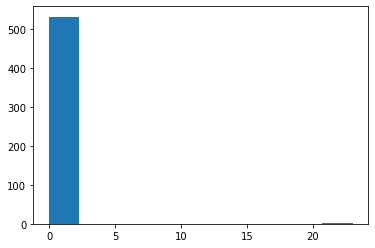

In [16]:
plt.hist(crypto_scaled[:,2])

In [24]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=0.99)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca.shape

(532, 86)

In [25]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca.shape

(532, 3)

In [27]:
#TSNE
tsne= TSNE(n_components=2)
#crypto_tsne = tsne

In [31]:
crypto_tsne = tsne.fit_transform(crypto_pca)
crypto_tsne.shape

(532, 2)

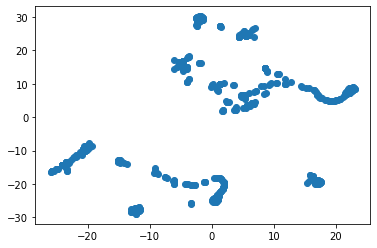

In [33]:
plt.scatter(x= crypto_tsne[:,0], y = crypto_tsne[:,1])
plt.show()

In [42]:
# Create an elbow curve to find the best value for K.

# Initialize empty inertia list
inertia = []
# Initialize k range
k = list(range(1,25))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


     k      inertia
0    1  3636.874424
1    2  2473.797011
2    3  1504.600798
3    4   587.664988
4    5   417.740272
5    6   308.528680
6    7   242.808299
7    8   193.017862
8    9   168.031428
9   10   126.702242
10  11   108.241274
11  12    93.385694
12  13    77.100923
13  14    69.827223
14  15    62.604572
15  16    55.842955
16  17    50.578244
17  18    44.378988
18  19    39.206973
19  20    34.476971
20  21    31.395339
21  22    28.844843
22  23    25.368882
23  24    23.301595


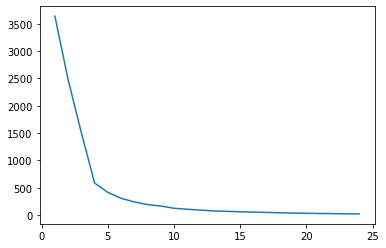

In [43]:
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.show()

In [45]:
km = KMeans(n_clusters=500, random_state=0)
km.fit(crypto_pca)
print(km.inertia_)

4.38246284917758e-10


# Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

K appears at 4 and greater.

In [39]:
crypto_pca.shape

(532, 3)

## Recommendation

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?

K means is doing great at the inertia. Kmeans is doing well at k=10. Considering the inertia is 0 whenever is K is approximately 500 I would highyly recommend this to my clients. I would highly recommend that this data can be clustered together. About 10 is how many clusters. 10 different types of cryptocurrencies.